In [1]:
import os
import dotenv
import sqlalchemy
import pandas as pd
from sqlalchemy import create_engine
dotenv.load_dotenv(override=True, dotenv_path="C:/Users/Giuseppe/OneDrive/Desktop/DATA ANALYST/3_PYTHON/.env")
username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")
conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname
db_engine = sqlalchemy.create_engine(conn_string)
query = "SELECT * FROM dimproduct"
pd.read_sql(query, db_engine)

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
0,1,AR-5381,NaN,None,None,Adjustable Race,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
1,2,BA-8327,NaN,None,None,Bearing Ball,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
2,3,BE-2349,NaN,None,None,BB Ball Bearing,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
3,4,BE-2908,NaN,None,None,Headset Ball Bearings,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
4,5,BL-2036,NaN,None,None,Blade,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,602,BB-8107,5.0,G,None,ML Bottom Bracket,Eje de pedalier GM,Axe de pédalier ML,44.95,1,...,铝合金车圈；大直径脚蹬轴。,فناجين من سبيكة الألومنيوم؛ ذات محور دوران كبي...,כיסויים מסגסוגת אלומיניום; ציר רחב-קוטר.,ดุมอลูมิเนียมอัลลอยด์ แกนเพลาขนาดใหญ่,Außenringe aus Aluminiumlegierung; Radachse mi...,アルミニウム合金カップ、大径スピンドル。,Alüminyum alaşımı orta göbekler; geniş çaplı mil.,2013-07-01,NaT,Current
602,603,BB-9108,5.0,G,None,HL Bottom Bracket,Eje de pedalier GA,Axe de pédalier HL,53.94,1,...,铝合金车圈和空心轴。,فناجين من سبيكة الألومنيوم ومحور أجوف.,כיסויים מסגסוגת אלומיניום וציר חלול.,ดุมอลูมิเนียมอัลลอยด์และเพลากลวง,Außenringe aus Aluminiumlegierung und hohle Ac...,アルミニウム合金カップとホロー アクスル。,Alüminyum alaşımı orta göbekler ve içi boş aks.,2013-07-01,NaT,Current
603,604,BK-R19B-44,2.0,LB,CM,"Road-750 Black, 44","Carretera: 750, negra, 44","Vélo de route 750 noir, 44",343.65,1,...,入门级成人自行车；确保越野旅行或公路骑乘的舒适。快拆式车毂和轮缘。,إنها دراجة مناسبة للمبتدئين من البالغين؛ فهي ت...,"אופני מבוגרים למתחילים; מציעים רכיבה נוחה ""מחו...",จักรยานระดับเริ่มต้นสำหรับผู้ใหญ่ ให้ความสบายใ...,Ein Erwachsenenrad für Einsteiger; bietet Komf...,エントリー レベルに対応する、クロスカントリーにも街への買い物にも快適な、大人の自転車。ハブ...,"""Başlangıç seviyesinde yetişkin bisikleti, kır...",2013-07-01,NaT,Current
604,605,BK-R19B-48,2.0,LB,CM,"Road-750 Black, 48","Carretera: 750, negra, 48","Vélo de route 750 noir, 48",343.65,1,...,入门级成人自行车；确保越野旅行或公路骑乘的舒适。快拆式车毂和轮缘。,إنها دراجة مناسبة للمبتدئين من البالغين؛ فهي ت...,"אופני מבוגרים למתחילים; מציעים רכיבה נוחה ""מחו...",จักรยานระดับเริ่มต้นสำหรับผู้ใหญ่ ให้ความสบายใ...,Ein Erwachsenenrad für Einsteiger; bietet Komf...,エントリー レベルに対応する、クロスカントリーにも街への買い物にも快適な、大人の自転車。ハブ...,"""Başlangıç seviyesinde yetişkin bisikleti, kır...",2013-07-01,NaT,Current


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_sql(query, db_engine)

In [4]:
df.shape

(606, 36)

In [5]:
df.columns

Index(['ProductKey', 'ProductAlternateKey', 'ProductSubcategoryKey',
       'WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'EnglishProductName',
       'SpanishProductName', 'FrenchProductName', 'StandardCost',
       'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint',
       'ListPrice', 'Size', 'SizeRange', 'Weight', 'DaysToManufacture',
       'ProductLine', 'DealerPrice', 'Class', 'Style', 'ModelName',
       'LargePhoto', 'EnglishDescription', 'FrenchDescription',
       'ChineseDescription', 'ArabicDescription', 'HebrewDescription',
       'ThaiDescription', 'GermanDescription', 'JapaneseDescription',
       'TurkishDescription', 'StartDate', 'EndDate', 'Status'],
      dtype='object')

In [6]:
df['DealerPrice']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
601     60.744
602     72.894
603    323.994
604    323.994
605    323.994
Name: DealerPrice, Length: 606, dtype: float64

In [7]:
df_arrot=df['DealerPrice'].round(2) #Su colonna Dealer Price utilizzando il metodo .round() .#. arrotondiamo i valori alle 2 cifre#
                           #decimali, e poi al valore intero più vicino #

In [8]:
df_arrot

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
601     60.74
602     72.89
603    323.99
604    323.99
605    323.99
Name: DealerPrice, Length: 606, dtype: float64

In [9]:
type(df['DealerPrice'])

pandas.core.series.Series

In [10]:
df_no_null=df_arrot.fillna(0) #Prima di trasformare i valori in interi bisogna eliminare / sostituire i valori nulli#
                   #In questo caso sono stati sostituiti ...#
df_no_null

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
        ...  
601     60.74
602     72.89
603    323.99
604    323.99
605    323.99
Name: DealerPrice, Length: 606, dtype: float64

In [11]:
df_SDP_int=df_no_null.astype(int) # A questo punto possiamo trasformare tutto in interi ... #
df_SDP_int

0        0
1        0
2        0
3        0
4        0
      ... 
601     60
602     72
603    323
604    323
605    323
Name: DealerPrice, Length: 606, dtype: int32

In [12]:
#Utilizzando il metodo .clip(), facciamo in modo che i valori siano compresi tra un minimo di 0 e un massimo di 1000#

In [13]:
df_SDP_int_clip=df_SDP_int.clip(lower=0,upper=1000)
df_SDP_int_clip

0        0
1        0
2        0
3        0
4        0
      ... 
601     60
602     72
603    323
604    323
605    323
Name: DealerPrice, Length: 606, dtype: int32

In [14]:
df_SDP_int_clip.describe()

count     606.000000
mean      248.305281
std       337.015463
min         0.000000
25%         0.000000
50%        37.000000
75%       438.500000
max      1000.000000
Name: DealerPrice, dtype: float64

In [15]:
#Creiamo un DataFrame sintetico, che contiene i guadagni mensili di diverse annate, con il seguente codice:    #

In [16]:
years = 2
a = pd.DataFrame({'Mese' : list('GFMAMGLASOND'*years),
                  'Anno' : np.repeat(list(range(years)), 12),
                  'Guadagni' : np.random.randint (800, 5000, 12*years)})
a

,Mese,Anno,Guadagni
0,G,0,2427
1,F,0,1723
2,M,0,4533
3,A,0,4341
4,M,0,2558
5,G,0,2648
6,L,0,2038
7,A,0,3768
8,S,0,1249
9,O,0,902


In [17]:
a["Guad_anno"] = a.groupby("Anno").Guadagni.cumsum()
a["Guad_anno"]

0      2427
1      4150
2      8683
3     13024
4     15582
5     18230
6     20268
7     24036
8     25285
9     26187
10    30227
11    32302
12     2630
13     3759
14     8666
15    12286
16    13619
17    18130
18    21248
19    25455
20    28637
21    31464
22    34082
23    36286
Name: Guad_anno, dtype: int32

<Axes: title={'center': 'Yearly Cumulative Sum'}>

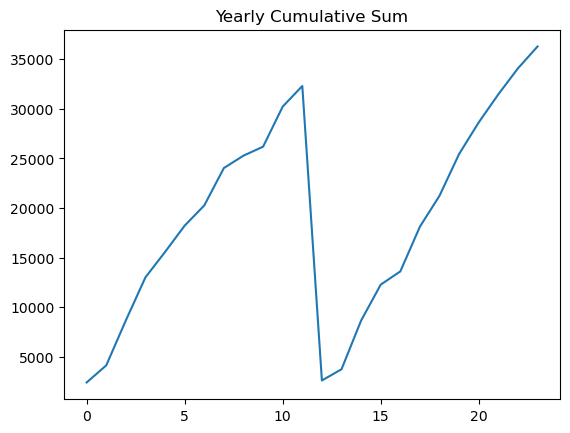

In [18]:
x=a["Guad_anno"]
import matplotlib.pyplot as plt
x.plot(title="Yearly Cumulative Sum")

In [19]:
import os
import dotenv
import sqlalchemy
import pandas as pd
from sqlalchemy import create_engine
dotenv.load_dotenv(override=True, dotenv_path="C:/Users/Giuseppe/OneDrive/Desktop/DATA ANALYST/3_PYTHON/.env")
username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")
conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname
db_engine = sqlalchemy.create_engine(conn_string)

In [20]:
query = "SELECT * FROM dimcustomer"
pd.read_sql(query, db_engine)

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,None,Jon,V,Yang,0,1971-10-06,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,None,1 (11) 500 555-0162,2011-01-19,1-2 Miles
1,11001,37,AW00011001,None,Eugene,L,Huang,0,1976-05-10,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,None,1 (11) 500 555-0110,2011-01-15,0-1 Miles
2,11002,31,AW00011002,None,Ruben,None,Torres,0,1971-02-09,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,None,1 (11) 500 555-0184,2011-01-07,2-5 Miles
3,11003,11,AW00011003,None,Christy,None,Zhu,0,1973-08-14,S,...,Professional,Profesional,Cadre,0,1,1825 Village Pl.,None,1 (11) 500 555-0162,2010-12-29,5-10 Miles
4,11004,19,AW00011004,None,Elizabeth,None,Johnson,0,1979-08-05,S,...,Professional,Profesional,Cadre,1,4,7553 Harness Circle,None,1 (11) 500 555-0131,2011-01-23,1-2 Miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,209,AW00029479,None,Tommy,L,Tang,0,1969-06-30,M,...,Clerical,Administrativo,Employé,1,0,"111, rue Maillard",None,1 (11) 500 555-0136,2012-09-04,0-1 Miles
18480,29480,248,AW00029480,None,Nina,W,Raji,0,1977-05-06,S,...,Clerical,Administrativo,Employé,1,0,9 Katherine Drive,None,1 (11) 500 555-0146,2013-07-17,0-1 Miles
18481,29481,120,AW00029481,None,Ivan,None,Suri,0,1965-07-04,S,...,Clerical,Administrativo,Employé,0,0,Knaackstr 4,None,1 (11) 500 555-0144,2011-08-13,0-1 Miles
18482,29482,179,AW00029482,None,Clayton,None,Zhang,0,1964-09-01,M,...,Clerical,Administrativo,Employé,1,0,"1080, quai de Grenelle",None,1 (11) 500 555-0137,2012-09-18,0-1 Miles


In [21]:
dim_cust=pd.read_sql(query, db_engine)

In [22]:
dim_cust

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,None,Jon,V,Yang,0,1971-10-06,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,None,1 (11) 500 555-0162,2011-01-19,1-2 Miles
1,11001,37,AW00011001,None,Eugene,L,Huang,0,1976-05-10,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,None,1 (11) 500 555-0110,2011-01-15,0-1 Miles
2,11002,31,AW00011002,None,Ruben,None,Torres,0,1971-02-09,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,None,1 (11) 500 555-0184,2011-01-07,2-5 Miles
3,11003,11,AW00011003,None,Christy,None,Zhu,0,1973-08-14,S,...,Professional,Profesional,Cadre,0,1,1825 Village Pl.,None,1 (11) 500 555-0162,2010-12-29,5-10 Miles
4,11004,19,AW00011004,None,Elizabeth,None,Johnson,0,1979-08-05,S,...,Professional,Profesional,Cadre,1,4,7553 Harness Circle,None,1 (11) 500 555-0131,2011-01-23,1-2 Miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,209,AW00029479,None,Tommy,L,Tang,0,1969-06-30,M,...,Clerical,Administrativo,Employé,1,0,"111, rue Maillard",None,1 (11) 500 555-0136,2012-09-04,0-1 Miles
18480,29480,248,AW00029480,None,Nina,W,Raji,0,1977-05-06,S,...,Clerical,Administrativo,Employé,1,0,9 Katherine Drive,None,1 (11) 500 555-0146,2013-07-17,0-1 Miles
18481,29481,120,AW00029481,None,Ivan,None,Suri,0,1965-07-04,S,...,Clerical,Administrativo,Employé,0,0,Knaackstr 4,None,1 (11) 500 555-0144,2011-08-13,0-1 Miles
18482,29482,179,AW00029482,None,Clayton,None,Zhang,0,1964-09-01,M,...,Clerical,Administrativo,Employé,1,0,"1080, quai de Grenelle",None,1 (11) 500 555-0137,2012-09-18,0-1 Miles


In [23]:
dim_cust.columns  #Esercizio 1/2 ...#

Index(['CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate',
       'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'SpanishEducation', 'FrenchEducation', 'EnglishOccupation',
       'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone',
       'DateFirstPurchase', 'CommuteDistance'],
      dtype='object')

In [24]:
dim_cust['FirstName'].str.lower()  #Trasforma i nomi in minuscolo ... #

0              jon
1           eugene
2            ruben
3          christy
4        elizabeth
           ...    
18479        tommy
18480         nina
18481         ivan
18482      clayton
18483        jésus
Name: FirstName, Length: 18484, dtype: object

In [25]:
dim_cust['LastName'].str.upper()  #Trasforma i Cognomi in maiuscolo ... #

0           YANG
1          HUANG
2         TORRES
3            ZHU
4        JOHNSON
          ...   
18479       TANG
18480       RAJI
18481       SURI
18482      ZHANG
18483    NAVARRO
Name: LastName, Length: 18484, dtype: object

In [26]:
#Sulla colonna EmailAdress, utilizzando il metodo .str.split(),estraiamo nome utente e dominio# 

In [27]:
dim_cust['EmailAddress'].str.split('@')

0             [jon24, adventure-works.com]
1          [eugene10, adventure-works.com]
2           [ruben35, adventure-works.com]
3         [christy12, adventure-works.com]
4        [elizabeth5, adventure-works.com]
                       ...                
18479        [tommy2, adventure-works.com]
18480        [nina21, adventure-works.com]
18481         [ivan0, adventure-works.com]
18482      [clayton0, adventure-works.com]
18483        [jésus9, adventure-works.com]
Name: EmailAddress, Length: 18484, dtype: object

In [28]:
#Sulla colonna Phone, estraiamo ogni parte del numero (Ad es. da 1 (11) ...)

In [29]:
dim_cust['Phone'].str.split(' ')

0        [1, (11), 500, 555-0162]
1        [1, (11), 500, 555-0110]
2        [1, (11), 500, 555-0184]
3        [1, (11), 500, 555-0162]
4        [1, (11), 500, 555-0131]
                   ...           
18479    [1, (11), 500, 555-0136]
18480    [1, (11), 500, 555-0146]
18481    [1, (11), 500, 555-0144]
18482    [1, (11), 500, 555-0137]
18483    [1, (11), 500, 555-0141]
Name: Phone, Length: 18484, dtype: object

In [30]:
#Utilizzando il metodo str.contains(), estraiamo tutti gli indirizzi e-mail che contengono il numero 21 #

In [31]:
dim_filtro21=dim_cust['EmailAddress'].str.contains('21')

In [32]:
dim_2=dim_cust[dim_filtro21]
dim_2['EmailAddress']

64          chase21@adventure-works.com
118         alvin21@adventure-works.com
130      caroline21@adventure-works.com
163       gabriel21@adventure-works.com
203          luis21@adventure-works.com
                      ...              
18337      hector21@adventure-works.com
18365      cheryl21@adventure-works.com
18435     stanley21@adventure-works.com
18440      rafael21@adventure-works.com
18480        nina21@adventure-works.com
Name: EmailAddress, Length: 431, dtype: object

In [33]:
#Esercizio 2/2 Estraiamo tutti gli indirizzi e-mail che contengono il numero '20' oppure il numero '10' #

In [34]:
dim_filtro20=dim_cust['EmailAddress'].str.contains('20')
dim_3=dim_cust[dim_filtro20]
dim_3['EmailAddress']

10        jacquelyn20@adventure-works.com
22            ethan20@adventure-works.com
79           donald20@adventure-works.com
115           alvin20@adventure-works.com
146           karla20@adventure-works.com
                       ...               
18342        cassie20@adventure-works.com
18369        arturo20@adventure-works.com
18384       latasha20@adventure-works.com
18415         oscar20@adventure-works.com
18428    kristopher20@adventure-works.com
Name: EmailAddress, Length: 483, dtype: object

In [35]:
dim_filtro10=dim_cust['EmailAddress'].str.contains('10')
dim_3=dim_cust[dim_filtro10]
dim_3['EmailAddress']

1         eugene10@adventure-works.com
30       bethany10@adventure-works.com
32        denise10@adventure-works.com
44          adam10@adventure-works.com
100      latasha10@adventure-works.com
                     ...              
18300        joe10@adventure-works.com
18330      alexa10@adventure-works.com
18395      lydia10@adventure-works.com
18397     walter10@adventure-works.com
18418    lindsey10@adventure-works.com
Name: EmailAddress, Length: 559, dtype: object

In [36]:
dim_cust["Lunghezza"] = dim_cust["EmailAddress"].str.len()
dim_cust['Lunghezza']    #Calcolare la lunghezza di ogni indirizzo e-mail ed estrarre i.. #

0        25
1        28
2        27
3        29
4        30
         ..
18479    26
18480    26
18481    25
18482    28
18483    26
Name: Lunghezza, Length: 18484, dtype: int64

In [37]:
dim_cust['Lunghezza'].describe()

count    18484.000000
mean        27.676098
std          1.485740
min         22.000000
25%         27.000000
50%         28.000000
75%         29.000000
max         33.000000
Name: Lunghezza, dtype: float64

In [38]:
dim_cust['Lunghezza']
dim_cust[['EmailAddress', 'Lunghezza']].sort_values('Lunghezza', ascending=False).head(10)

,EmailAddress,Lunghezza
9242,christopher11@adventure-works.com,33
2655,christopher23@adventure-works.com,33
14964,christopher26@adventure-works.com,33
3512,christopher27@adventure-works.com,33
17017,christopher15@adventure-works.com,33
13417,christopher14@adventure-works.com,33
10233,christopher24@adventure-works.com,33
16661,christopher17@adventure-works.com,33
1767,christopher18@adventure-works.com,33
8768,christopher12@adventure-works.com,33


In [39]:
dim_cust['Lunghezza']   #... ed i 10 più corti .... #
dim_cust[['EmailAddress', 'Lunghezza']].sort_values('Lunghezza', ascending=True).head(10)

,EmailAddress,Lunghezza
3974,k0@adventure-works.com,22
15299,y0@adventure-works.com,22
1658,joy2@adventure-works.com,24
550,deb4@adventure-works.com,24
13888,roy9@adventure-works.com,24
6264,ian1@adventure-works.com,24
2326,bob8@adventure-works.com,24
13825,zoe3@adventure-works.com,24
215,ana7@adventure-works.com,24
11213,jay9@adventure-works.com,24


In [40]:
d_min=dim_cust['Lunghezza'].min()

In [41]:
d_min

22

In [42]:
dim_cust_filtrato=dim_cust['Lunghezza']==d_min
dim_cust_mail_min=dim_cust[dim_cust_filtrato]

In [43]:
dim_cust_mail_min[['EmailAddress','Lunghezza']]

,EmailAddress,Lunghezza
3974,k0@adventure-works.com,22
15299,y0@adventure-works.com,22


In [44]:
dim_cust_mail_rep = dim_cust['EmailAddress'].str.replace('adventure-works.com', 'aw-db.com')

In [45]:
dim_cust_mail_rep   #Modificare il dominio degli indirizzi e-mail da 'adventure-works.com' a 'aw-db.com' mediante #
                    #il metodo .str.replace() #

0             jon24@aw-db.com
1          eugene10@aw-db.com
2           ruben35@aw-db.com
3         christy12@aw-db.com
4        elizabeth5@aw-db.com
                 ...         
18479        tommy2@aw-db.com
18480        nina21@aw-db.com
18481         ivan0@aw-db.com
18482      clayton0@aw-db.com
18483        jésus9@aw-db.com
Name: EmailAddress, Length: 18484, dtype: object

In [46]:
#Dalla colonna AddressLine1 estraiamo tutti gli indirizzi che contengono la sottostringa 'Street' #

In [47]:
dim_filter_Add=dim_cust['AddressLine1'].str.contains('Street')

In [48]:
dim_filtro_Street=dim_cust['AddressLine1'].str.contains('Street')
dim_Street=dim_cust[dim_filtro_Street]
dim_Street['AddressLine1']

7              942 Brook Street
12            4785 Scott Street
32           626 Bentley Street
63           4927 Virgil Street
125          8481 Zartop Street
                  ...          
18273        2155 Zartop Street
18292         3931 Scott Street
18323    134 Peachwillow Street
18333       1023 Hawkins Street
18351          8618 Rose Street
Name: AddressLine1, Length: 512, dtype: object

In [49]:
filepath = "C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV/facebook.csv" 
fac = pd.read_csv(filepath)   #Ci siamo connessi alla tabella Facebook #

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV/facebook.csv'

In [ ]:
fac # Dal beginner_datasets estraiamo il file facebook.csv....#

In [ ]:
fac['status_published'] = pd.to_datetime(fac['status_published'], format='%m/%d/%Y %H:%M')

In [ ]:
fac['status_published'] #... convertiamo la colonna 'status_published' in formato Timestamp ...'

In [ ]:
fac['status_published'] = fac['status_published'].dt.strftime('%d-%m-%y') #utilizzando il metodo .df.strftime formatta
fac                                                                   # le date delle pubblicazioni ...#

In [ ]:
fac['status_published'] = pd.to_datetime(fac.status_published)
fac['Year'] = fac['status_published'].dt.year
fac['Year'] #Utilizzando gli attributi .dt.year - .dt.month ecc....otteniamo delle informazioni ...# 

In [ ]:
fac['Month'] = fac['status_published'].dt.month
fac['Month']

In [ ]:
fac['Day'] = fac['status_published'].dt.day
fac['Day']

In [ ]:
fac['Year'] = fac['status_published'].dt.year

In [ ]:
d=fac['Year']==2012 #Estraiamo solo i post relativi al 2012 ...]
d.value_counts()

In [ ]:
fac_filtrato=fac[d]

In [ ]:
fac_filtrato

In [ ]:
filtro = (fac['status_published'].dt.year == 2018) & (fac['status_published'].dt.month == 5)
fac_filtrato = fac[filtro]  #Solo i post relativi a Maggio 2018  #

In [ ]:
fac_filtrato

In [ ]:
fac['WeekDay']=fac['status_published'].dt.dayofweek #Confrontiamo il numero di post... nel weekend #

In [ ]:
fac['WeekDay'] 

In [ ]:
filtro = (fac['status_published'].dt.dayofweek == 5) | (fac['status_published'].dt.dayofweek == 6)
fac_weekend = fac[filtro]  #Solo i post relativi del week end  #

In [ ]:
fac['status_published'].dt.dayofweek == 5  #Applico un filtro per il Sabato #

In [ ]:
fac['status_published'].dt.dayofweek == 6 #Applico un filtro per la Domenica #

In [ ]:
fac_weekend

In [ ]:
filtro2 = (fac['status_published'].dt.dayofweek != 5) & (fac['status_published'].dt.dayofweek != 6)
fac_wor_day = fac[filtro2]  #Solo i post dei giorni feriali  #

In [ ]:
fac_wor_day

In [ ]:
x=filtro.sum()
y=filtro2.sum()
print(f'Il numero di post nel week sono stati : {x} \nIl numero di post nei giorni feriali sono stati : {y}')

In [ ]:
fac.describe() #Troviamo il primo e l'ultimo post pubblicati per ogni anno.. vediamo max e min del db #

In [ ]:
d=fac['Year']==2012 #i post vanno dal 2012 al 2018 #

In [ ]:
for anno, gruppo in fac.groupby(fac['status_published'].dt.year):
    P_riga = gruppo.iloc[0]
    U_riga = gruppo.iloc[-1]
    print('--------------')
    print(f'Anno {anno}')
    print('Prima riga:')
    print(P_riga)
    print(                )
    print('Ultima riga:')
    print(U_riga)

In [ ]:
#Utilizzando il metodo tz.localize(), aggiungendo un fuso orario alle date delle transazioni ...#

In [ ]:
fac['status_published'].info() #verifico il formato della colonna 'status_published' è un object#

In [ ]:
fac['status_published']=pd.to_datetime(fac.status_published) #lo modifico in datetime#

In [ ]:
fac['status_published'].info() #verifico il formato della colonna 'status_published' adesso è un Datetime#

In [ ]:
fac.status_published.loc[0]-fac.status_published.loc[22] #Adesso posso calcolare la differenza tra due date#

In [ ]:
f_status_type=fac.groupby('status_type').size()

In [ ]:
f_status_type.sort_values(ascending=False)

In [ ]:
filepath = "C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV/pokemon.csv"
pok = pd.read_csv(filepath)  #Carichiamo il dataset Pokemon #

In [ ]:
pok

In [ ]:
#Tramite i metodi .isnull() e .sum() controlliamo se ci sono valori nulli nel dataset e contiamo quanti valori nulli#
#ci sono in ogni colonna#

In [ ]:
pok.isnull().sum() #...questo perchè i boleani corrispondono al valore 0 se falso ed 1 se vero# 

In [ ]:
#si ci sono valori nulli solo nella colonna 'Type 2' #

In [ ]:
pok['Type 2']

In [ ]:
pok

In [ ]:
pok['Type 2'].value_counts()

In [ ]:
a=pok['Name']=='Mankey' #non ha senso riempirli perchè si riferiscono a caratteristiche/poteri che il pokemon può avere #
pok[a]                  # o meno ... #

In [ ]:
#non possono essere eliminate le righe contenenti valori nulli perchè verrebbero 386 pokemon su 800 #

In [ ]:
# ... carichiamo il dataset automobile.csv ...#

In [ ]:
filepath = "C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV/automobile.csv"
auto = pd.read_csv(filepath)  #Carichiamo il dataset automobile #

In [ ]:
auto.isnull().sum() # ... ci sono valori nulli? dove? Quanti?

In [ ]:
a_null=auto.loc[:,'num-of-doors'].isnull() #con questo mi ricavo i valori boleani della colonna 'num-of-doors' ... per poi fare#
auto[a_null]                                    #un filtro ...e ricavarmi le righe che hanno il valore nullo #

In [ ]:
n_dx_body_loc=auto.groupby('body-style')['num-of-doors'].value_counts()

In [ ]:
n_dx_body_loc

In [ ]:
n_dx_eng_loc=auto.groupby('engine-location')['num-of-doors'].value_counts()

In [ ]:
n_dx_eng_loc

In [ ]:
#Abbiamo il seguente DataFrame che raccoglie le misurazioni di un sensore che misura la temperatura atmosferica giornaliera#


In [ ]:
temp=pd.DataFrame({'Giorno' : [0,1,2,3,4,5,6,
                               7,8,9,10,11,12],
                   'Temperature': [18,19,18,np.nan,21,20,20,np.nan,21,23,np.nan,23,24]})
#Il sensore a volte non funziona ... ci sono dati mancanti qual'è la migliore strategia per gestirli? #
                                

In [ ]:
temp

In [ ]:
temp.interpolate(method='linear') #Il miglior metodo in questo caso è la f(x) interpolate() #

In [ ]:
#Nel pacchetto os della Standard Library c'è la f(x) os.listdir() ....

In [ ]:
import os

In [62]:
CSV_list=os.listdir('C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV')
CSV_list

['automobile.csv', 'diabetes.csv', 'insurance.csv', 'iris.csv', 'pokemon.csv']

In [79]:
CSV_list=os.listdir('C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV')

null_ds=[]
not_null_ds=[]

for ds in CSV_list:
    count=0
    df = pd.read_csv(f'{"C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV"}/{ds}')
    x=df.isna().sum()
    tot_x = x.sum()
    if tot_x>0 :
        null_ds.append(ds)
    else : 
        not_null_ds.append(ds)
        
print(f'La lista dei files con valori nulli:{null_ds}')

print(f'La lista dei files con valori non nulli:{not_null_ds}')

La lista dei files con valori nulli:['automobile.csv', 'pokemon.csv']
La lista dei files con valori non nulli:['diabetes.csv', 'insurance.csv', 'iris.csv']
